In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pickle

from flygym.envs.nmf_mujoco import MuJoCoParameters
from flygym.arena.mujoco_arena import FlatTerrain
import flygym.util.vision as vision
from odor_vision import ObstacleOdorArena, NMFObservation


In [7]:
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True, enable_olfaction=True)

save_path = "../../data"
num_pos = 1000
steps = 2

In [8]:
dataset = []

for f in trange(num_pos):
    arena = ObstacleOdorArena()
    spawn_pos = (np.random.randint(-1,25),np.random.randint(-12,12),0.5)
    spawn_orient = (0,0,1,np.random.random()*2*np.pi)
    sim = NMFObservation(
        sim_params=sim_params,
        arena=arena,
        obj_threshold=50,
        spawn_pos=spawn_pos,
        spawn_orient=spawn_orient
    )

    for i in range(steps):
        obs,_,_,_,_ = sim.step([0,0])
        dataset.append(obs)
        sim.render()

    sim.save_video(f"test_{f}.mp4")
    sim.close()

  1%|          | 6/1000 [00:37<1:42:57,  6.21s/it]


KeyboardInterrupt: during initialization of attribute 'geom1' of element <pair>: 

In [ ]:
dataset = np.array(dataset)
with open(save_path+"/dataset.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [ ]:
with open(save_path+"/dataset.pkl", "rb") as f:
    data = pickle.load(f)

[ 1.02859947 -4.00913877  1.        ]


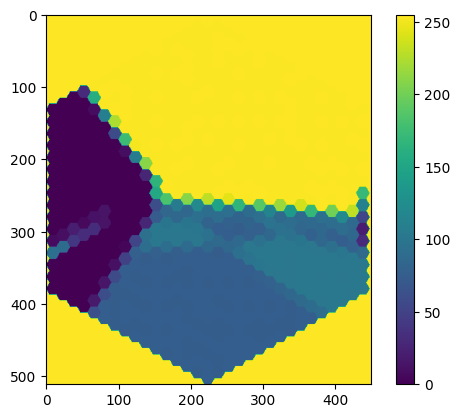

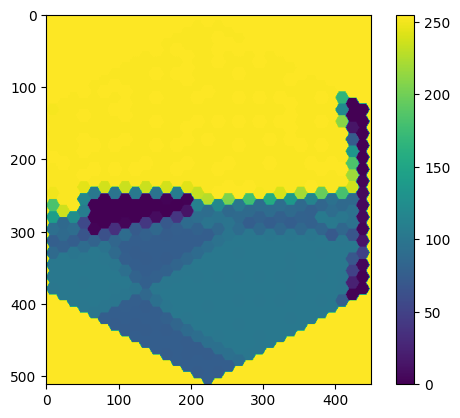

[ 1.02698617 -4.01100787  1.        ]


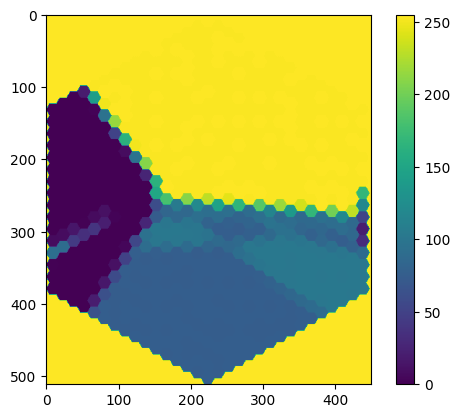

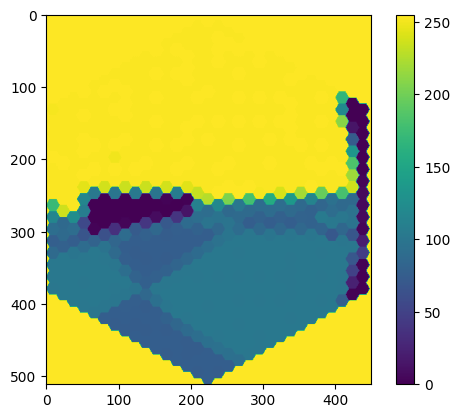

[8.99114362 9.97078715 1.        ]


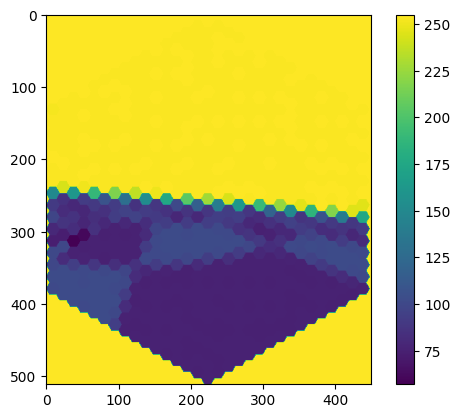

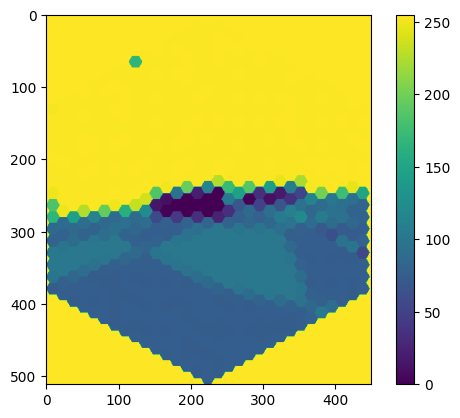

[8.99103608 9.97108821 1.        ]


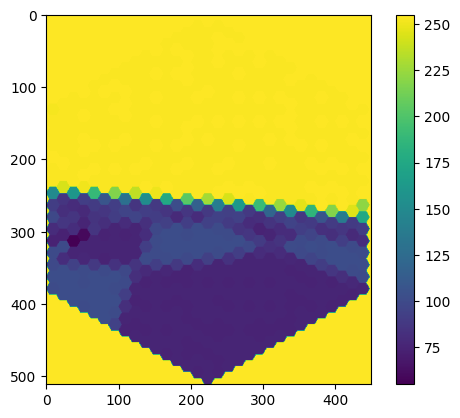

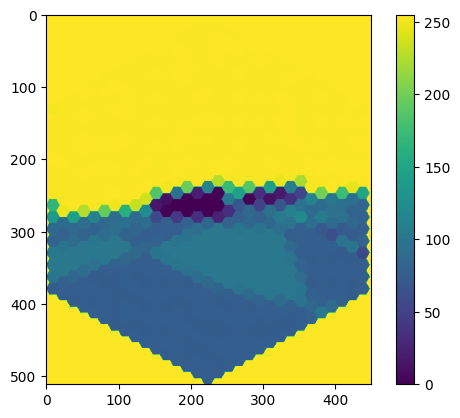

[ 9.00681818 -4.97024835  1.        ]


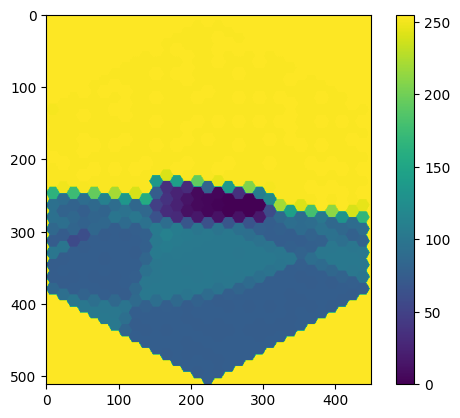

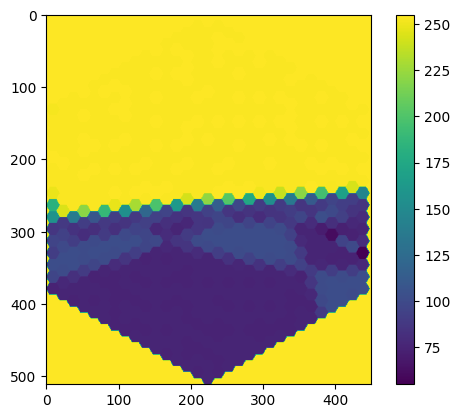

[ 9.0069185  -4.97054235  1.        ]


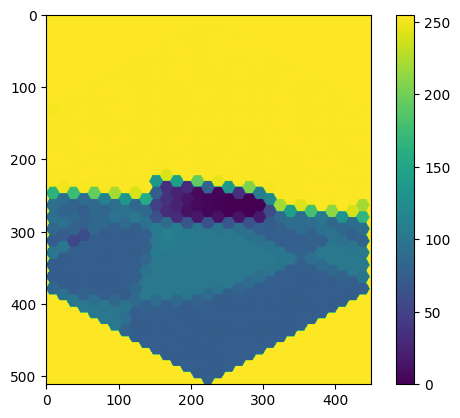

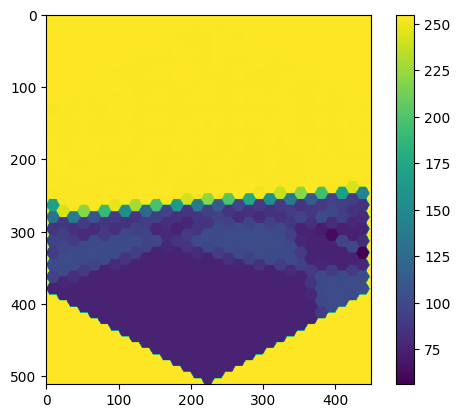

[ 3.99865051 -0.96947348  1.        ]


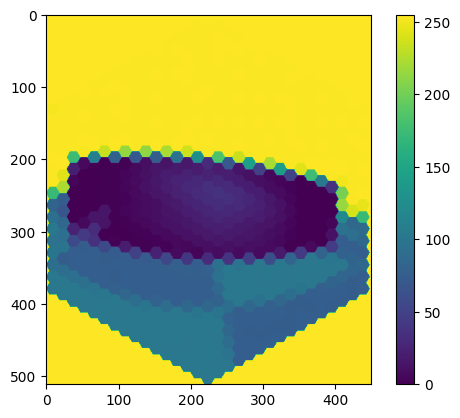

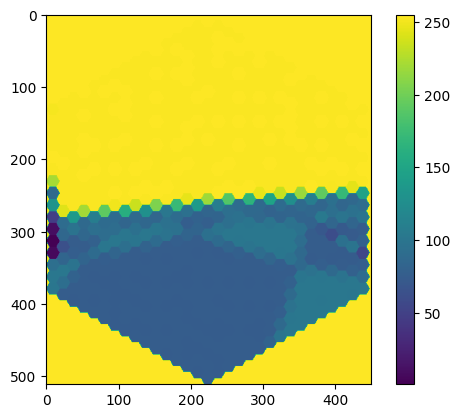

[ 3.99864682 -0.9696906   1.        ]


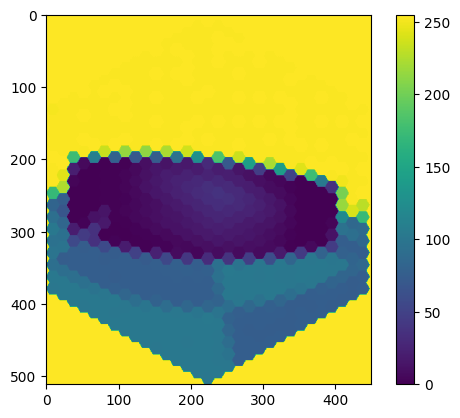

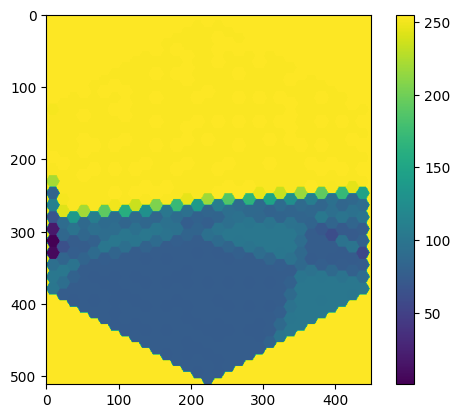

[7.01424073 0.02695202 1.        ]


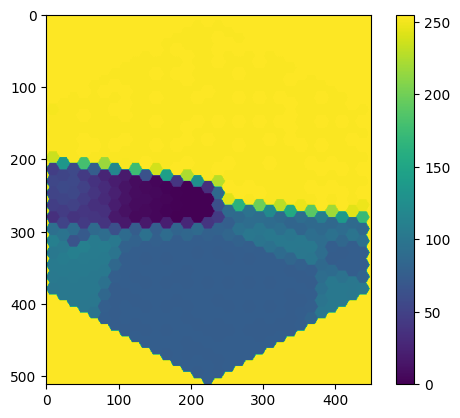

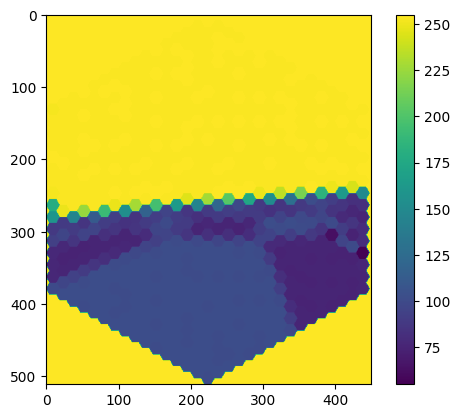

[7.01410356 0.02666147 1.        ]


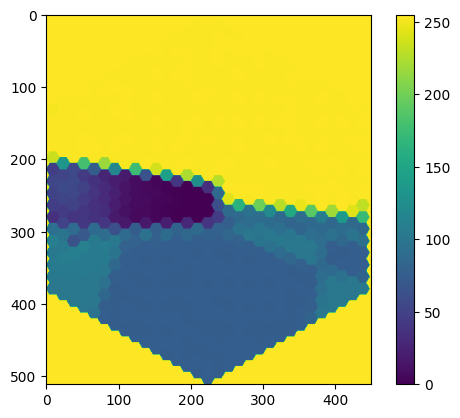

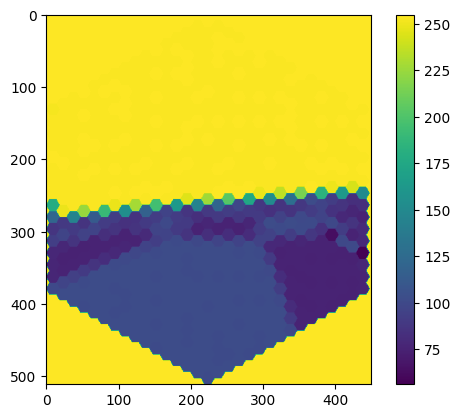

[7.98723435 4.97231431 1.        ]


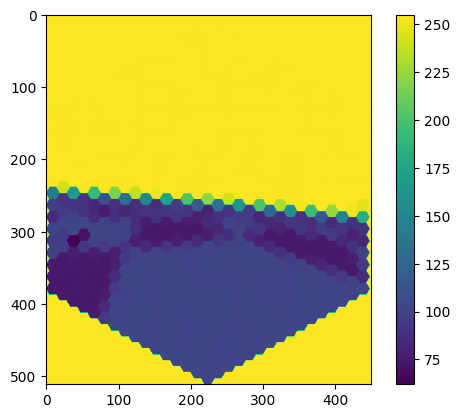

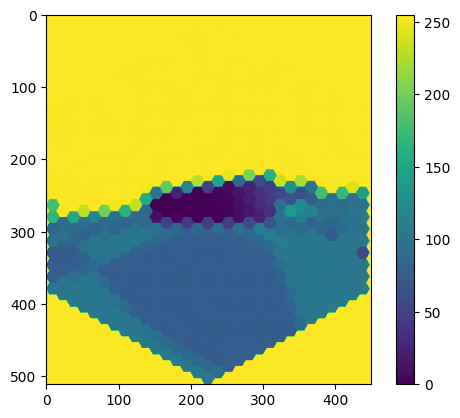

[7.98735386 4.97260401 1.        ]


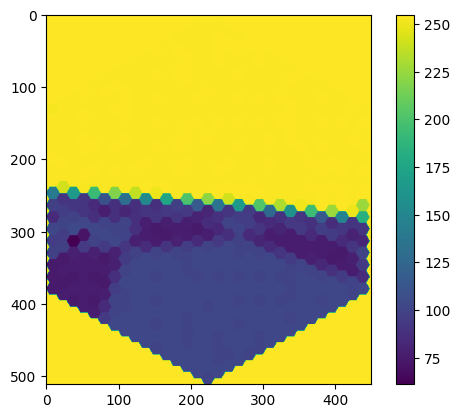

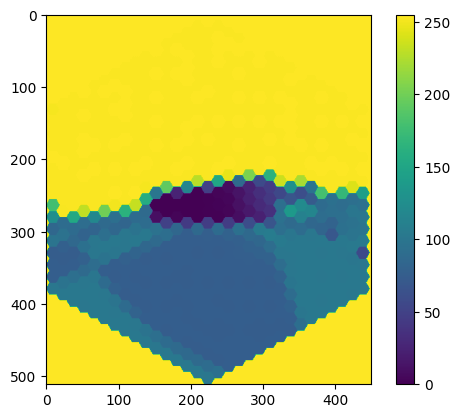

[-3.01403948  6.02717676  1.        ]


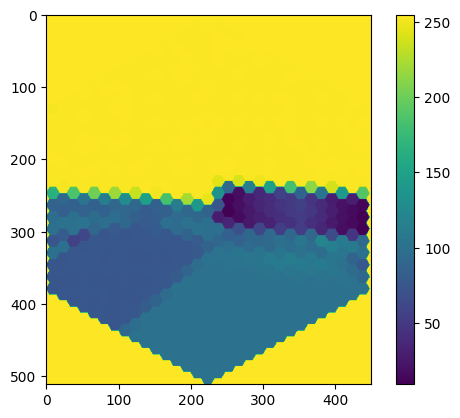

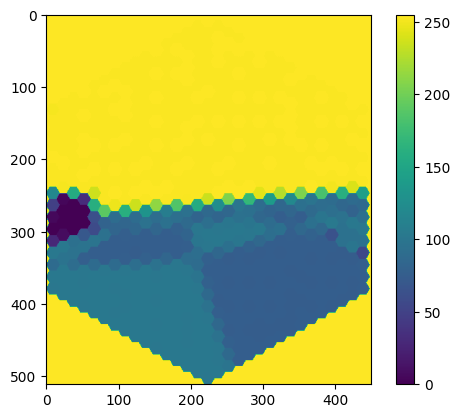

[-3.01388478  6.02710878  1.        ]


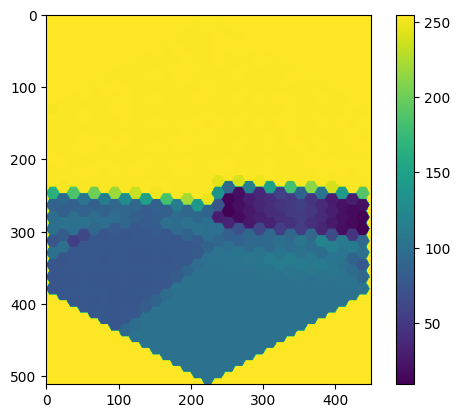

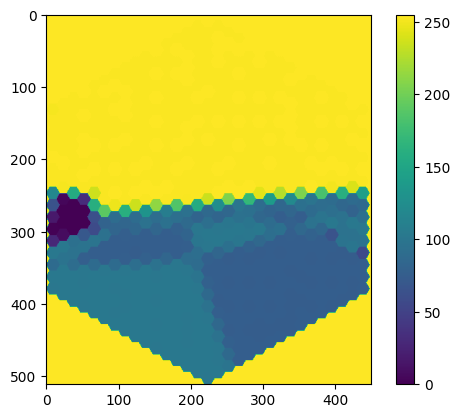

[ 8.97159716 -2.98890144  1.        ]


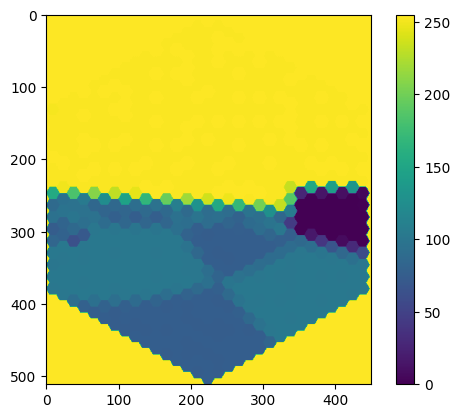

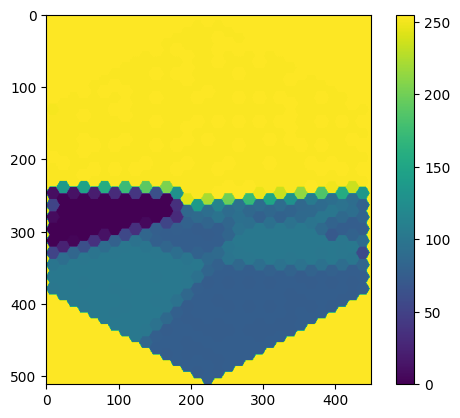

[ 8.97189461 -2.98897551  1.        ]


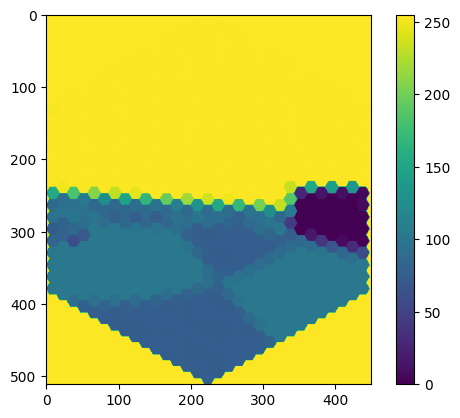

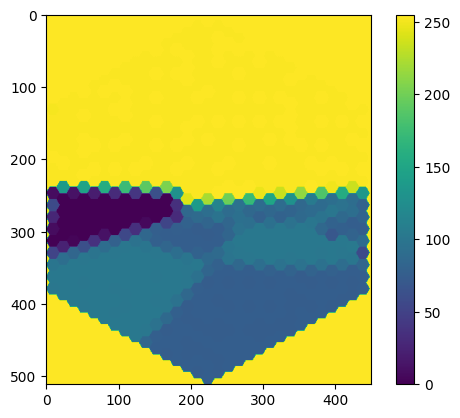

[ 8.01573142 11.97388568  1.        ]


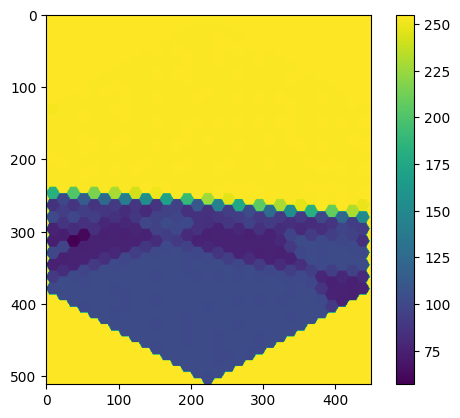

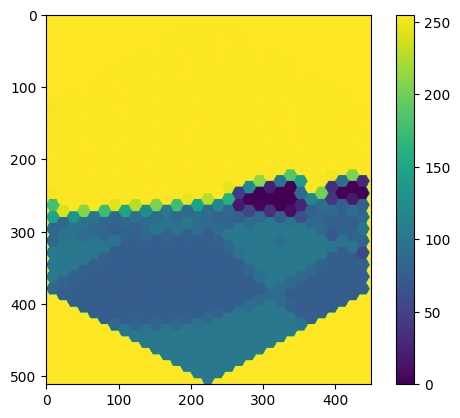

[ 8.01554362 11.97413512  1.        ]


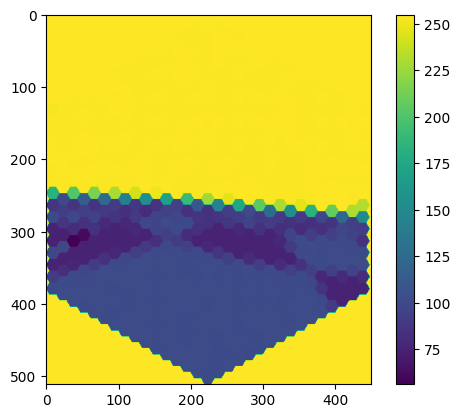

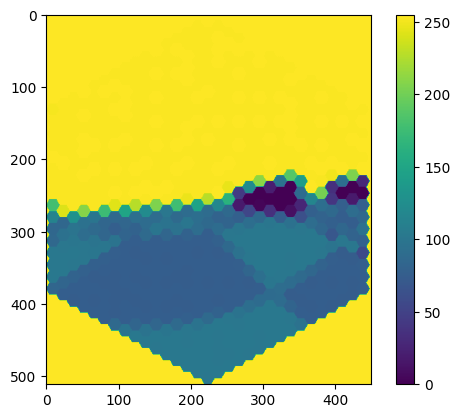

[2.9799844  6.97692816 1.        ]


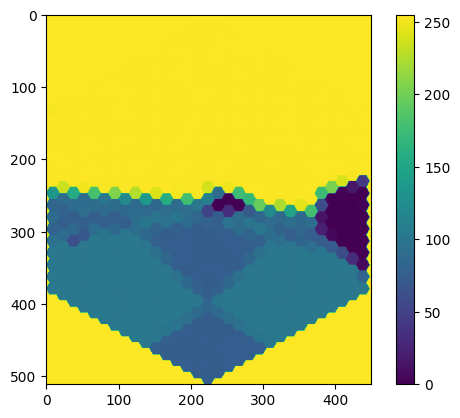

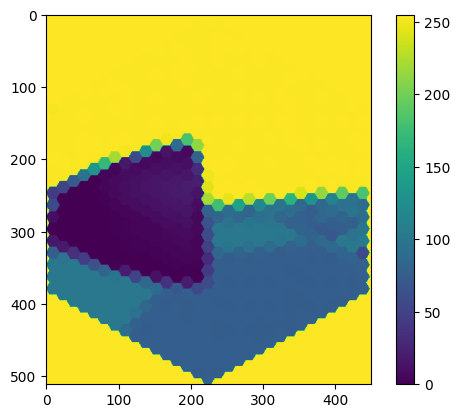

[2.98011414 6.97710929 1.        ]


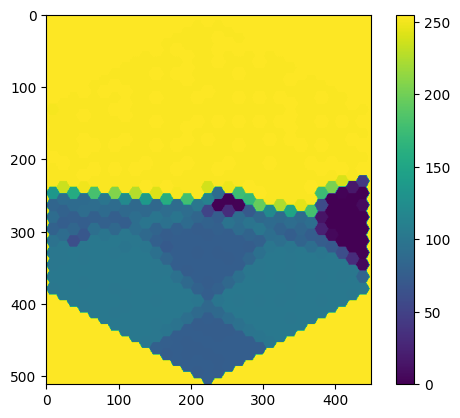

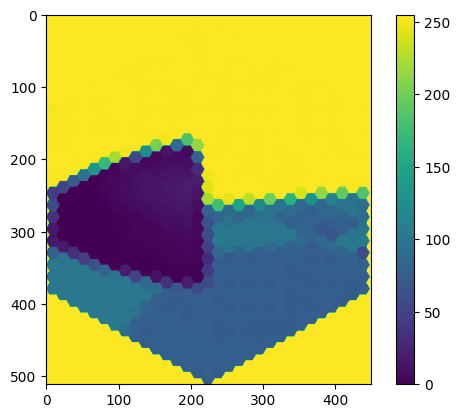

In [5]:
for sample in data[:10]:
    vis = sample[:-3]
    features = sample[-3:]
    print(features)

    vis_input = np.array(vis)
    vis_input = np.reshape(vis_input, (2,-1))
    vis_input = np.stack((vis_input, np.zeros_like(vis_input)), axis=2)
    hr = vision.hex_pxls_to_human_readable(vis_input[0,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    hr = vision.hex_pxls_to_human_readable(vis_input[1,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    